<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Camara_dos_Deputados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução:**

# Este projeto de Eric Villac tem como objetivo apresentar a composição por partido, geografica e o respectivo excelentíssimo parlamentar que exerce suas funções em alguma frente parlamentar referente a 56ª legistatura (2019-2023) e as comissões do Congresso Nacional.

# Foram utilizadas as APIs do site de Dados Abertos da Câmara dos Deputados.

In [ ]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import Request
from urllib.error import URLError, HTTPError
!pip install xmltodict
import xmltodict
import matplotlib.pyplot as plt
!pip install pywaffle
from pywaffle import Waffle
!pip install plotly --upgrade
!pip install plotly.express --upgrade

import plotly.express as px
import pandas as pd
import plotly
import pandas as pd
import requests
from plotly.subplots import make_subplots
from plotly import graph_objects as go

1. Importando bibliotecas para trabalhar com Dados Abertos

In [ ]:
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome'

In [ ]:
resposta = requests.get(url)

In [ ]:
resposta.text

'{"dados":[{"id":204554,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204554","nome":"Abílio Santana","siglaPartido":"PL","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/37906","siglaUf":"BA","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204554.jpg","email":"dep.abiliosantana@camara.leg.br"},{"id":204521,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204521","nome":"Abou Anni","siglaPartido":"PSL","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36837","siglaUf":"SP","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204521.jpg","email":"dep.abouanni@camara.leg.br"},{"id":204379,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204379","nome":"Acácio Favacho","siglaPartido":"PROS","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36763","siglaUf":"AP","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204379.jpg

In [ ]:
df = pd.DataFrame(resposta.json() ['dados'])
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [ ]:
df.shape

(513, 9)

In [ ]:
df['nome']

0       Abílio Santana
1            Abou Anni
2       Acácio Favacho
3         Adolfo Viana
4      Adriana Ventura
            ...       
508          Zé Carlos
509            Zé Neto
510           Zé Silva
511           Zé Vitor
512        Zeca Dirceu
Name: nome, Length: 513, dtype: object

In [ ]:
#retorna um campo com base no índice [linha, coluna]
df.iloc[2,2]

'Acácio Favacho'

In [ ]:
df.loc[2,'nome']

'Acácio Favacho'

# **1. Consulta da relação dos Partidos Políticos representados nas frentes parlamentares**

# Consulta de todas a frentes paralamentares

In [ ]:
url2 = 'https://dadosabertos.camara.leg.br/api/v2/frentes'

In [ ]:
resposta2 = requests.get(url2)

In [ ]:
resposta2.text

'{"dados":[{"id":54266,"uri":"https://dadosabertos.camara.leg.br/api/v2/frentes/54266","titulo":"Frente Parlamentar dos Transplantes","idLegislatura":56},{"id":54264,"uri":"https://dadosabertos.camara.leg.br/api/v2/frentes/54264","titulo":"Frente Parlamentar Mista Brasil Competitivo","idLegislatura":56},{"id":54226,"uri":"https://dadosabertos.camara.leg.br/api/v2/frentes/54226","titulo":"Frente Parlamentar Mista Pela Causa da Prematuridade","idLegislatura":56},{"id":54263,"uri":"https://dadosabertos.camara.leg.br/api/v2/frentes/54263","titulo":"Frente Parlamentar em Defesa das Energias Renováveis - FER","idLegislatura":56},{"id":54260,"uri":"https://dadosabertos.camara.leg.br/api/v2/frentes/54260","titulo":"Frente Parlamentar Mista de Apoio ao Mercado de Varejo e E-Commerce-FREVEC","idLegislatura":56},{"id":54261,"uri":"https://dadosabertos.camara.leg.br/api/v2/frentes/54261","titulo":"Frente Parlamentar da Câmara dos Deputados Brasil - Bolívia.","idLegislatura":56},{"id":54259,"uri":"

In [ ]:
df2 = pd.DataFrame(resposta2.json() ['dados'])
df2.head()

,id,uri,titulo,idLegislatura
0,54266,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar dos Transplantes,56
1,54264,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar Mista Brasil Competitivo,56
2,54226,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar Mista Pela Causa da Prematu...,56
3,54263,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar em Defesa das Energias Reno...,56
4,54260,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar Mista de Apoio ao Mercado d...,56


Escolher a 56ª legislatura (2019-2023)

In [ ]:
filtro  = df2[df2['idLegislatura'] == 56]


In [ ]:
filtro.shape

(342, 4)

In [ ]:
filtro['titulo'].unique()

array(['Frente Parlamentar dos Transplantes',
       'Frente Parlamentar Mista Brasil Competitivo',
       'Frente Parlamentar Mista Pela Causa da Prematuridade',
       'Frente Parlamentar em Defesa das Energias Renováveis - FER',
       'Frente Parlamentar Mista de Apoio ao Mercado de Varejo e E-Commerce-FREVEC',
       'Frente Parlamentar da Câmara dos Deputados Brasil - Bolívia.',
       'Frente Parlamentar em Defesa da Desoneração da Folha de Pagamento',
       'Frente Parlamentar Mista Pelo Fortalecimento do SUS',
       'Frente Parlamentar Mista em Defesa da Renda Básica',
       'Frente Parlamentar Mista da Telessaúde',
       'Frente Parlamentar em Defesa do Comércio de Material de Construção',
       'Frente Parlamentar em Defesa do Plano Nacional de Educação',
       'Frente Parlamentar Mista pela Adoção e Convivência Familiar',
       'Frente Parlamentar Mista para Implantação do Plenário Virtual no Poder Legislativo',
       'Frente Parlamentar em Defesa da Democratização 

In [ ]:
filtro.loc[filtro['titulo'] == 'Frente Parlamentar da Agropecuária - FPA']


,id,uri,titulo,idLegislatura
321,53910,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar da Agropecuária - FPA,56


In [ ]:
filtro.loc[filtro['titulo'] == 'Frente Parlamentar da Segurança Pública']


,id,uri,titulo,idLegislatura
341,53890,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar da Segurança Pública,56


In [ ]:
filtro.loc[filtro['titulo'] == 'Frente Parlamentar em Apoio à Indústria da Construção Civil e do Mercado Imobiliário']


,id,uri,titulo,idLegislatura
293,53944,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar em Apoio à Indústria da Con...,56


In [ ]:
filtro.loc[filtro['titulo'] == 'Frente Parlamentar Mista da Economia Criativa']


,id,uri,titulo,idLegislatura
138,54117,https://dadosabertos.camara.leg.br/api/v2/fren...,Frente Parlamentar Mista da Economia Criativa,56


Membros

In [ ]:
url3 = 'https://dadosabertos.camara.leg.br/api/v2/frentes/53910/membros'

In [ ]:
resposta3 = requests.get(url3)

In [ ]:
resposta3.text

'{"dados":[{"id":178933,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/178933","nome":"Sergio Souza","siglaPartido":"MDB","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36899","siglaUf":"PR","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/178933.jpg","email":null,"titulo":"Coordenador","codTitulo":14,"dataInicio":null,"dataFim":null},{"id":66828,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/66828","nome":"Fausto Pinato","siglaPartido":"PP","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/37903","siglaUf":"SP","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/66828.jpg","email":null,"titulo":"Membro","codTitulo":1004,"dataInicio":null,"dataFim":null},{"id":68720,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/68720","nome":"Fábio Henrique","siglaPartido":"PDT","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36786","siglaUf":"SE","idLegisl

In [ ]:
df3 = pd.DataFrame(resposta3.json() ['dados'])
df3.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email,titulo,codTitulo,dataInicio,dataFim
0,178933,https://dadosabertos.camara.leg.br/api/v2/depu...,Sergio Souza,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,PR,56,https://www.camara.leg.br/internet/deputado/ba...,None,Coordenador,14,None,None
1,66828,https://dadosabertos.camara.leg.br/api/v2/depu...,Fausto Pinato,PP,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
2,68720,https://dadosabertos.camara.leg.br/api/v2/depu...,Fábio Henrique,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,SE,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
3,73441,https://dadosabertos.camara.leg.br/api/v2/depu...,Celso Russomanno,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
4,73460,https://dadosabertos.camara.leg.br/api/v2/depu...,Gustavo Fruet,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None


In [ ]:
df3[df3['titulo']=='Coordenador']

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email,titulo,codTitulo,dataInicio,dataFim
0,178933,https://dadosabertos.camara.leg.br/api/v2/depu...,Sergio Souza,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,PR,56,https://www.camara.leg.br/internet/deputado/ba...,None,Coordenador,14,None,None


In [ ]:
df3filtro  = df3[df3['titulo'] == 'Membro']


In [ ]:
df3filtro

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email,titulo,codTitulo,dataInicio,dataFim
1,66828,https://dadosabertos.camara.leg.br/api/v2/depu...,Fausto Pinato,PP,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
2,68720,https://dadosabertos.camara.leg.br/api/v2/depu...,Fábio Henrique,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,SE,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
3,73441,https://dadosabertos.camara.leg.br/api/v2/depu...,Celso Russomanno,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
4,73460,https://dadosabertos.camara.leg.br/api/v2/depu...,Gustavo Fruet,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
5,73466,https://dadosabertos.camara.leg.br/api/v2/depu...,Rubens Bueno,CIDADANIA,https://dadosabertos.camara.leg.br/api/v2/part...,PR,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,204576,https://dadosabertos.camara.leg.br/api/v2/depu...,João Roma,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
241,205865,https://dadosabertos.camara.leg.br/api/v2/depu...,Reinhold Stephanes Junior,PSD,https://dadosabertos.camara.leg.br/api/v2/part...,PR,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
242,207176,https://dadosabertos.camara.leg.br/api/v2/depu...,Bia Cavassa,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,MS,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None
243,207309,https://dadosabertos.camara.leg.br/api/v2/depu...,Enéias Reis,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,https://www.camara.leg.br/internet/deputado/ba...,None,Membro,1004,None,None


In [ ]:
def encontra_frente_parlamentar(id,nome):
  url3 = f'https://dadosabertos.camara.leg.br/api/v2/frentes/{id}/membros'
  resposta3 = requests.get(url3)
  df3 = pd.DataFrame(resposta3.json() ['dados'])
  df3filtro  = df3[df3['titulo'] == 'Membro']
  result = pd.concat([df3filtro['nome'], df3filtro['siglaPartido'],df3filtro['siglaUf']], axis=1)
  labels = df3.siglaPartido
  sizes = df3.siglaPartido.value_counts()
  #colors
  
  fig1, ax1 = plt.subplots(figsize = (16,10))
  ax1.pie(df3.siglaPartido.value_counts(), labels=df3.siglaPartido.unique(), autopct='%1.1f%%', startangle=30)
  #draw circle
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  # Equal aspect ratio ensures that pie is drawn as a circle
  ax1.axis('equal') 
  plt.suptitle(f'{nome}' ) 
  fig.subplots_adjust(top=0.9)
  plt.tight_layout()
  plt.show()
  print('Coordenador',df3[df3['titulo']=='Coordenador']['nome'][0], '-',df3[df3['titulo']=='Coordenador']['siglaPartido'][0])
  fig = go.Figure(data=[go.Table(header=dict(values=['Nome do Parlamentar'],
                fill_color='paleturquoise'),
                 cells=dict(values=[result],
               fill_color='lavender'))
                     ])
  fig.show()
  



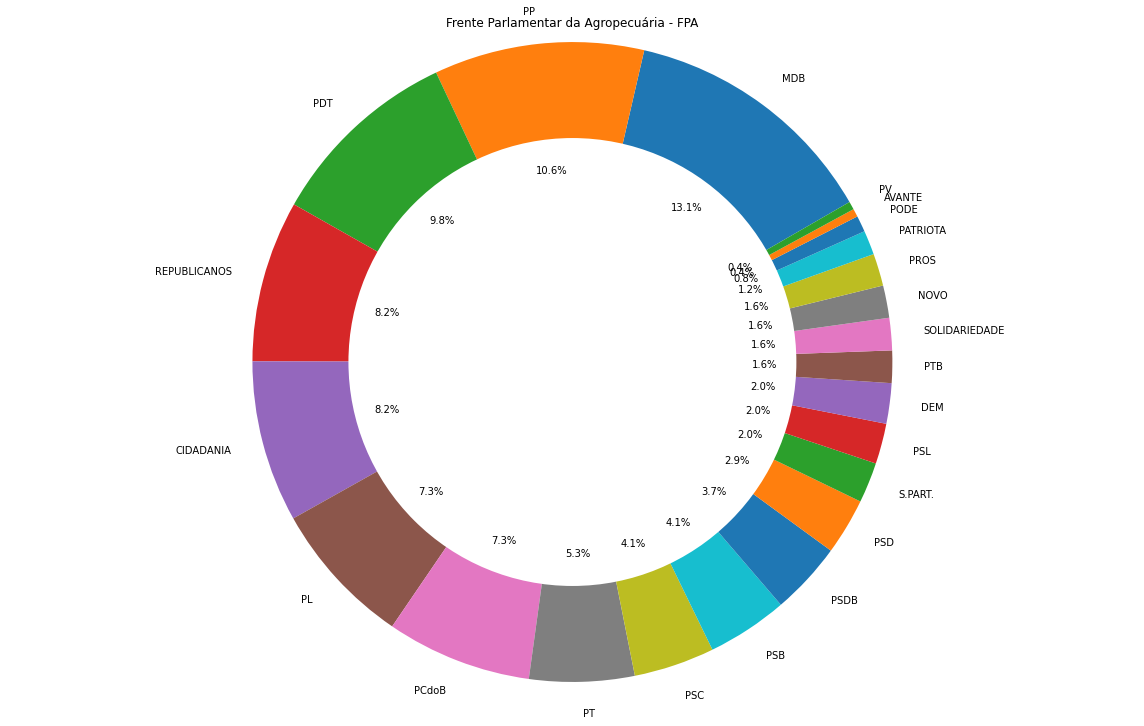

Coordenador Sergio Souza - MDB


In [ ]:
encontra_frente_parlamentar(53910,'Frente Parlamentar da Agropecuária - FPA');

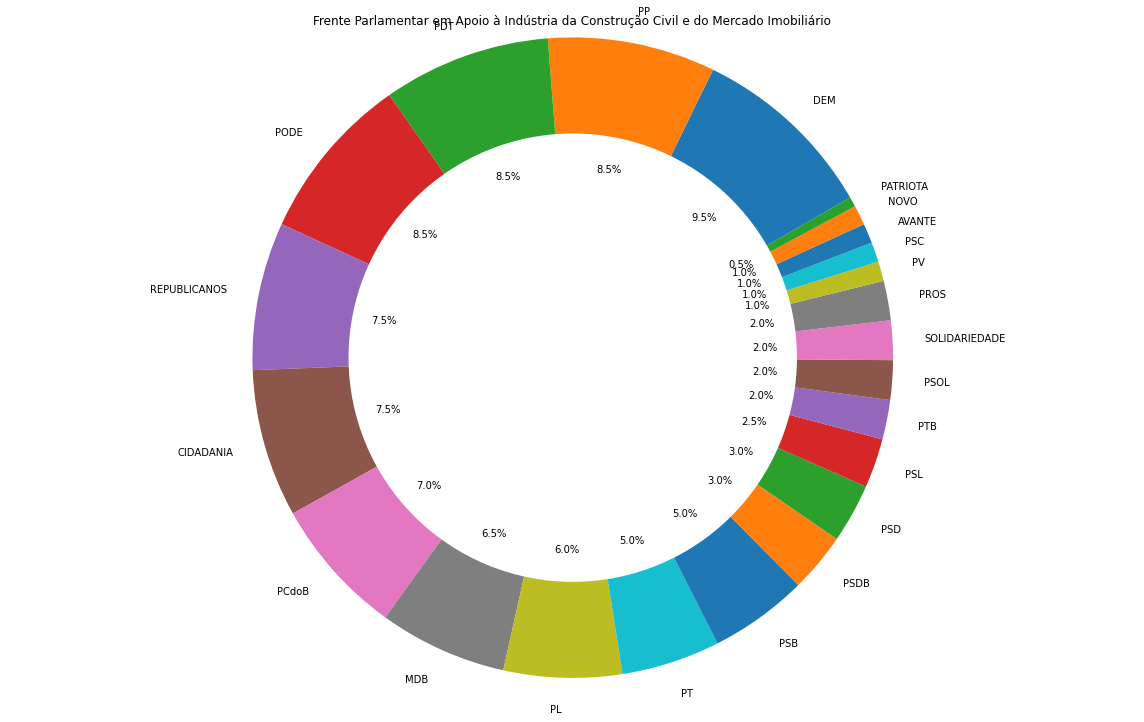

Coordenador Carlos Henrique Gaguim - DEM


In [ ]:
encontra_frente_parlamentar(53944,'Frente Parlamentar em Apoio à Indústria da Construção Civil e do Mercado Imobiliário');

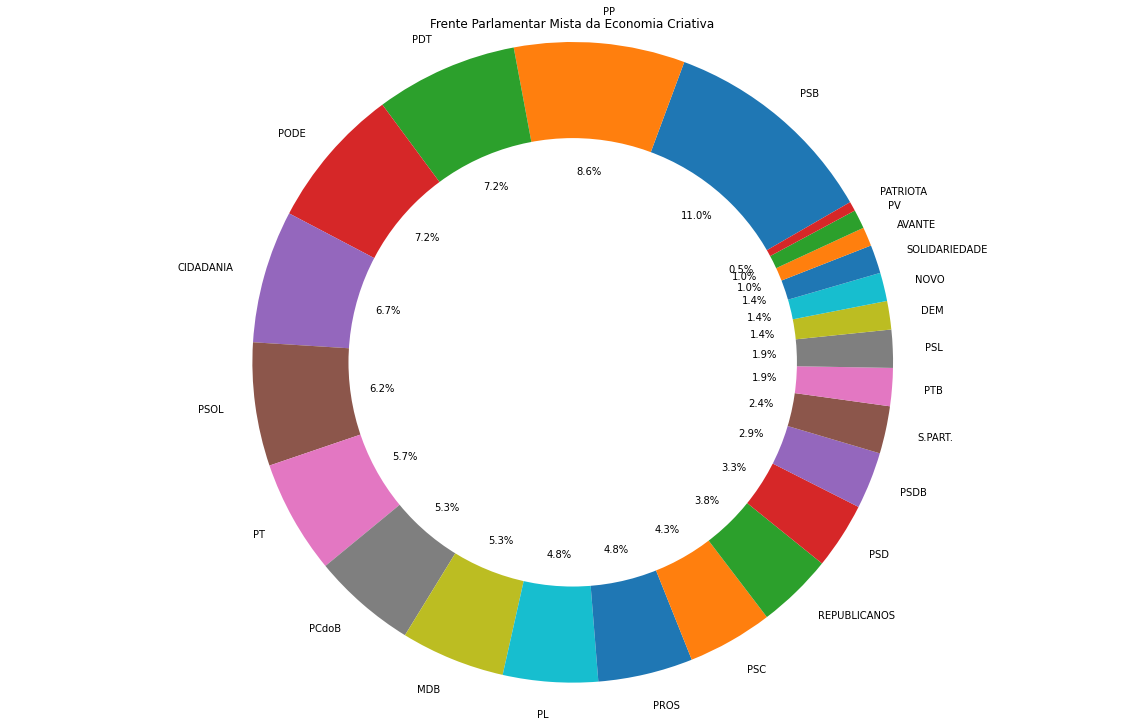

Coordenador Lídice da Mata - PSB


In [ ]:
encontra_frente_parlamentar(54117,'Frente Parlamentar Mista da Economia Criativa');

# **2. Encontrar órgãos/ Comissões**

In [ ]:
urlpartm ='https://dadosabertos.camara.leg.br/api/v2/orgaos?ordem=ASC&ordenarPor=id'

In [ ]:
resppartm = requests.get(urlpartm)
resppartm.text

'{"dados":[{"id":4,"uri":"https://dadosabertos.camara.leg.br/api/v2/orgaos/4","sigla":"MESA","nome":"Mesa Diretora da Câmara dos Deputados","apelido":"Mesa Diretora","codTipoOrgao":1,"tipoOrgao":"Comissão Diretora","nomePublicacao":"Mesa Diretora"},{"id":51,"uri":"https://dadosabertos.camara.leg.br/api/v2/orgaos/51","sigla":"Judiciário","nome":"Judiciário","apelido":"Judiciário","codTipoOrgao":50000,"tipoOrgao":"Órgão do Poder Judiciário","nomePublicacao":"Judiciário"},{"id":57,"uri":"https://dadosabertos.camara.leg.br/api/v2/orgaos/57","sigla":"MPU","nome":"MINISTÉRIO PÚBLICO DA UNIÃO","apelido":"MINISTÉRIO PÚBLICO DA UNIÃO","codTipoOrgao":50000,"tipoOrgao":"Órgão do Poder Judiciário","nomePublicacao":"MINISTÉRIO PÚBLICO DA UNIÃO"},{"id":60,"uri":"https://dadosabertos.camara.leg.br/api/v2/orgaos/60","sigla":"PR","nome":"Presidência da República","apelido":"PRESIDÊNCIA DA REPÚBLICA","codTipoOrgao":30000,"tipoOrgao":"Órgão do Poder Executivo","nomePublicacao":"PRESIDÊNCIA DA REPÚBLICA"}

In [ ]:
dfpartm = pd.DataFrame(resppartm.json() ['dados'])
dfpartm.head()

,id,uri,sigla,nome,apelido,codTipoOrgao,tipoOrgao,nomePublicacao
0,4,https://dadosabertos.camara.leg.br/api/v2/orga...,MESA,Mesa Diretora da Câmara dos Deputados,Mesa Diretora,1,Comissão Diretora,Mesa Diretora
1,51,https://dadosabertos.camara.leg.br/api/v2/orga...,Judiciário,Judiciário,Judiciário,50000,Órgão do Poder Judiciário,Judiciário
2,57,https://dadosabertos.camara.leg.br/api/v2/orga...,MPU,MINISTÉRIO PÚBLICO DA UNIÃO,MINISTÉRIO PÚBLICO DA UNIÃO,50000,Órgão do Poder Judiciário,MINISTÉRIO PÚBLICO DA UNIÃO
3,60,https://dadosabertos.camara.leg.br/api/v2/orga...,PR,Presidência da República,PRESIDÊNCIA DA REPÚBLICA,30000,Órgão do Poder Executivo,PRESIDÊNCIA DA REPÚBLICA
4,78,https://dadosabertos.camara.leg.br/api/v2/orga...,SF,Senado Federal,Senado Federal,40000,Órgão do Poder Legislativo,Senado Federal


In [ ]:
dfpartm['nome'].unique()

array(['Mesa Diretora da Câmara dos Deputados', 'Judiciário',
       'MINISTÉRIO PÚBLICO DA UNIÃO', 'Presidência da República',
       'Senado Federal',
       'Senado Federal (Comissão Mista - Art 142 e 143 do Regimento Comum)',
       'Supremo Tribunal Federal', 'Superior Tribunal de Justiça',
       'Tribunal de Contas da União', 'Gráfica - Senado Federal',
       'CONGRESSO NACIONAL', 'Plenário',
       'COORDENAÇÃO DE COMISSÕES PERMANENTES',
       'PODER CONCLUSIVO NAS COMISSÕES',
       'PRESIDÊNCIA DA CÂMARA DOS DEPUTADOS', 'Poder Executivo',
       'Fundação Pioneiras Sociais', 'Superior Tribunal Militar',
       'Tribunal Superior do Trabalho', 'Tribunal Superior Eleitoral',
       'LÍDER DO PFL', 'LÍDER DO PPB', 'LÍDER DO PMDB',
       'CONSELHO DE MINISTROS', 'PCM', 'MIC',
       'Consultoria de Orçamento e Fiscalização Financeira da Câmara dos Deputados',
       'COMISSÃO DIRETORA', 'LÍDERES PARTIDÁRIOS',
       'Tribunal Federal de Recursos', 'COMISSÃO DE DIPLOMACIA',
   

In [ ]:
dfpartm[dfpartm['nome']== 'Comissão de Relações Exteriores e de Defesa Nacional']

,id,uri,sigla,nome,apelido,codTipoOrgao,tipoOrgao,nomePublicacao
58,2018,https://dadosabertos.camara.leg.br/api/v2/orga...,CREDN,Comissão de Relações Exteriores e de Defesa Na...,RELAÇÕES EXTERIORES E DE DEFESA NACIONAL,2,Comissão Permanente,COMISSÃO DE RELAÇÕES EXTERIORES E DE DEFESA NA...


In [ ]:
dfpartm[dfpartm['nome']== 'Comissão de Constituição e Justiça e de Cidadania']

,id,uri,sigla,nome,apelido,codTipoOrgao,tipoOrgao,nomePublicacao
45,2003,https://dadosabertos.camara.leg.br/api/v2/orga...,CCJC,Comissão de Constituição e Justiça e de Cidadania,CONSTITUIÇÃO E JUSTIÇA E DE CIDADANIA,2,Comissão Permanente,COMISSÃO DE CONSTITUIÇÃO E JUSTIÇA E DE CIDADANIA


In [ ]:
dfpartm[dfpartm['nome']== 'Comissão de Minas e Energia']

,id,uri,sigla,nome,apelido,codTipoOrgao,tipoOrgao,nomePublicacao
53,2012,https://dadosabertos.camara.leg.br/api/v2/orga...,CME,Comissão de Minas e Energia,MINAS E ENERGIA,2,Comissão Permanente,COMISSÃO DE MINAS E ENERGIA


In [ ]:
dfpartm[dfpartm['nome']== 'Comissão de Finanças e Tributação']

,id,uri,sigla,nome,apelido,codTipoOrgao,tipoOrgao,nomePublicacao
51,2010,https://dadosabertos.camara.leg.br/api/v2/orga...,CFT,Comissão de Finanças e Tributação,FINANÇAS E TRIBUTAÇÃO,2,Comissão Permanente,COMISSÃO DE FINANÇAS E TRIBUTAÇÃO


In [ ]:
dfpartm[dfpartm['nome']== 'Comissão de Desenvolvimento Econômico, Indústria, Comércio e Serviços']

,id,uri,sigla,nome,apelido,codTipoOrgao,tipoOrgao,nomePublicacao
49,2008,https://dadosabertos.camara.leg.br/api/v2/orga...,CDEICS,"Comissão de Desenvolvimento Econômico, Indústr...","DES. ECONÔMICO, INDÚSTRIA, COMÉRCIO E SERVIÇOS",2,Comissão Permanente,"COMISSÃO DE DES. ECONÔMICO, INDÚSTRIA, COMÉRCI..."




Detalhando cada comissão e criando função que automatiza a geração de gráficos

In [ ]:
#Função para automatizar a busca. Basta encontrar o id na busca acima e colocar o nome da comissão
def plota_comissao(id, nome):
  urlxc ='https://dadosabertos.camara.leg.br/api/v2/orgaos/{}/membros'.format(id)
  respurlxc = requests.get(urlxc)
  dfurlxc = pd.DataFrame(respurlxc.json() ['dados'])
  result = pd.concat([dfurlxc['nome'], dfurlxc['siglaPartido'],dfurlxc['siglaUf']], axis=1)


  fig = make_subplots(rows=2, cols=1)


  fig.add_trace(
      go.Bar(
          name="UF representadas",
          x=dfurlxc.siglaUf,
          y=dfurlxc.siglaUf.value_counts(),
      ),
      row=1,
      col=1,
  )






  fig.add_trace(
      go.Bar(
          name="Partidos representados",
          x=dfurlxc.siglaPartido,
          y=dfurlxc.siglaPartido.value_counts(),
      ),
      row=2,
      col=1,
  )

  fig.update_layout(height=700, width=800, title_text="Composição da {}".format(nome))




  fig2 = go.Figure(data=[go.Table(header=dict(values=['Nome do Parlamentar na Comissão'],
                  fill_color='paleturquoise'),
                  cells=dict(values=[result],
                fill_color='lavender'))
                      ])

  fig.update_layout(height=700, width=800, title_text="Composição da {}".format(nome))



  fig.show()
  fig2.show()









In [ ]:
plota_comissao(2018, 'CREDEN')

In [ ]:
plota_comissao(2003, 'Comissão de Constituição e Justiça e de Cidadania')

In [ ]:
plota_comissao(2001, 'Comissão de Minas e Energia')

In [ ]:
plota_comissao(2010, 'Comissão de Finanças e Tributação	')

In [ ]:
plota_comissao(2008, 'Comissão de Desenvolvimento Econômico, Indústria, Comércio e Serviços')